In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.manifold import TSNE

import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

In [2]:
hf_spec = h5py.File("/data/praveen/GDR3_non_null_resampled_spectra.h5", "r")
df1 = pd.DataFrame(hf_spec["spectra"])

hf_spec_2 = h5py.File("/data/praveen/GDR3_missed60K_resampled_spectra.h5", "r")
df2 = pd.DataFrame(hf_spec_2["spectra"])

frames = [df1, df2]
result = pd.concat(frames)

In [6]:
result.head()

,0,1,2,3,4,5,6,7,8,9,...,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
PLOT_MASK = range(1475,1550) #Halpha mask

In [7]:
df_masked = result.loc[:,PLOT_MASK]

In [8]:
df_masked.head()

,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
0,1.002929,1.020100,1.024491,1.022349,1.012781,0.992014,0.972579,0.980616,1.017553,1.024633,...,0.981723,1.000010,1.010591,0.986887,0.998070,1.034840,1.039356,1.017275,1.003299,0.992692
1,0.913974,0.925080,0.914015,0.910713,0.909456,0.895285,0.886678,0.900813,0.901776,0.873538,...,0.920796,0.959569,0.955362,0.919839,0.916352,0.927437,0.954766,0.975278,0.964925,0.940629
2,0.852568,0.855619,0.852560,0.847285,0.843284,0.833912,0.815157,0.815373,0.822885,0.808645,...,0.850151,0.841934,0.837705,0.847344,0.861569,0.875073,0.886794,0.884729,0.878885,0.859658
3,0.799966,0.805414,0.790533,0.784372,0.764509,0.766564,0.785371,0.782442,0.776574,0.776972,...,0.826576,0.834315,0.820822,0.824237,0.821758,0.825028,0.833799,0.852333,0.860145,0.859907
4,0.762165,0.753905,0.756847,0.772023,0.768651,0.756399,0.747767,0.750086,0.752324,0.737946,...,0.807266,0.821148,0.830479,0.826671,0.820743,0.815063,0.803316,0.793477,0.788137,0.810344


In [9]:
#embeddings = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(df_np)
#embeddings = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate='warn', n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='warn', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None, square_distances='legacy').fit_transform(df_np)
embeddings = TSNE(n_components=2, perplexity=30.0, learning_rate='auto', init='random', angle=0.5).fit_transform(df_masked)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]

In [10]:
type(vis_x)

numpy.ndarray

In [11]:
df = pd.DataFrame({'vis_x': vis_x,
                   'vis_y': vis_y})

In [12]:
df.head()

,vis_x,vis_y
0,-17.560810,-103.503189
1,-51.899612,-19.612391
2,21.193064,-34.045216
3,62.118259,-23.649710
4,62.582741,18.635887


In [13]:
df.to_csv("run_all_masked_20220211.csv")

In [14]:
embeddings[:, 0]

array([-17.56081 , -51.899612,  21.193064, ...,  57.90229 , -45.166195,
        78.717575], dtype=float32)

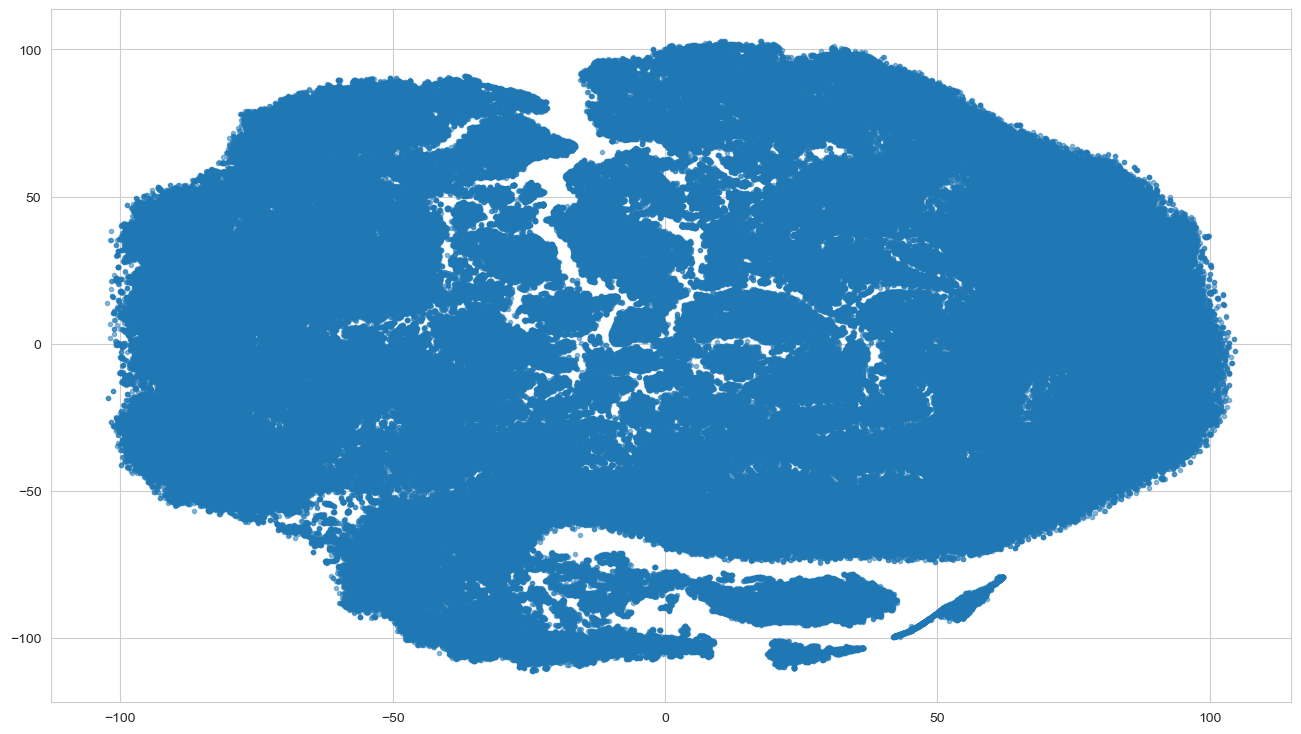

In [15]:
plt.scatter(vis_x, vis_y, marker='.', alpha=0.5)
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5)
plt.show()

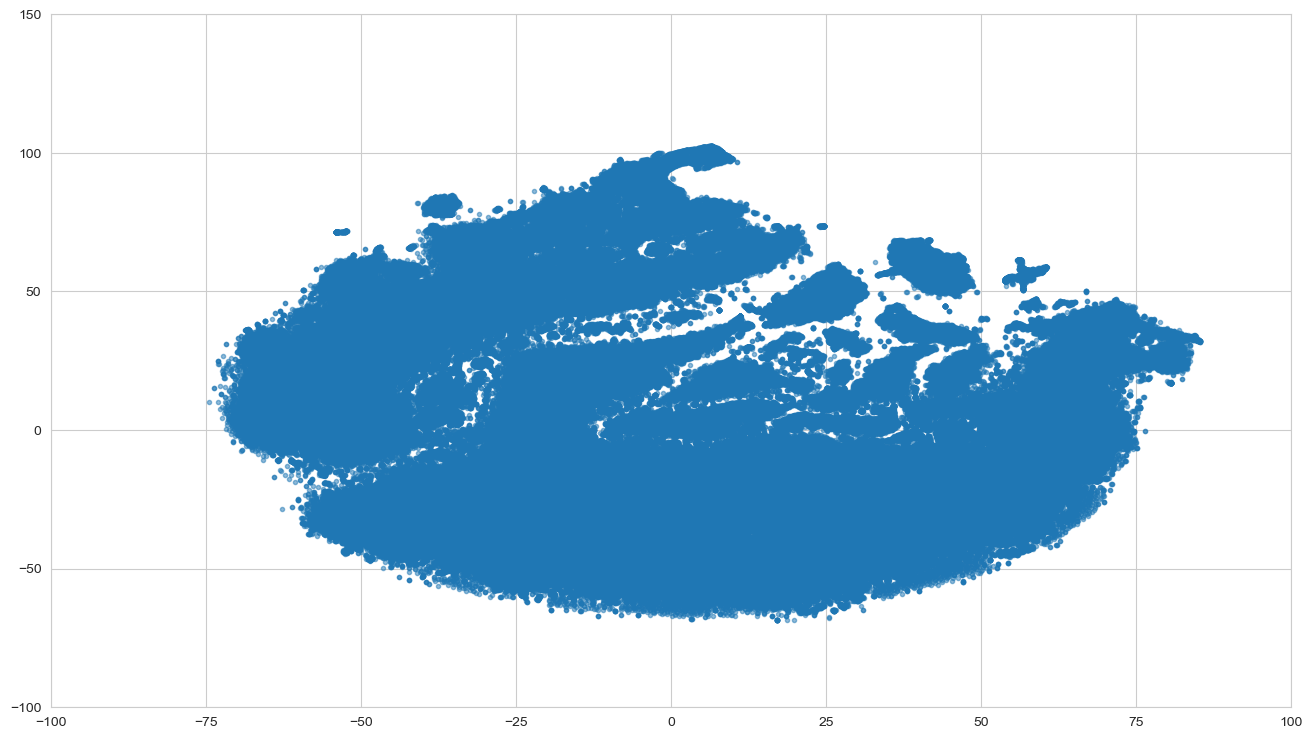

In [10]:
plt.scatter(vis_x, vis_y, marker='.', alpha=0.5)
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5)
plt.xlim([-100,100])
plt.ylim([-100,150])
plt.show()

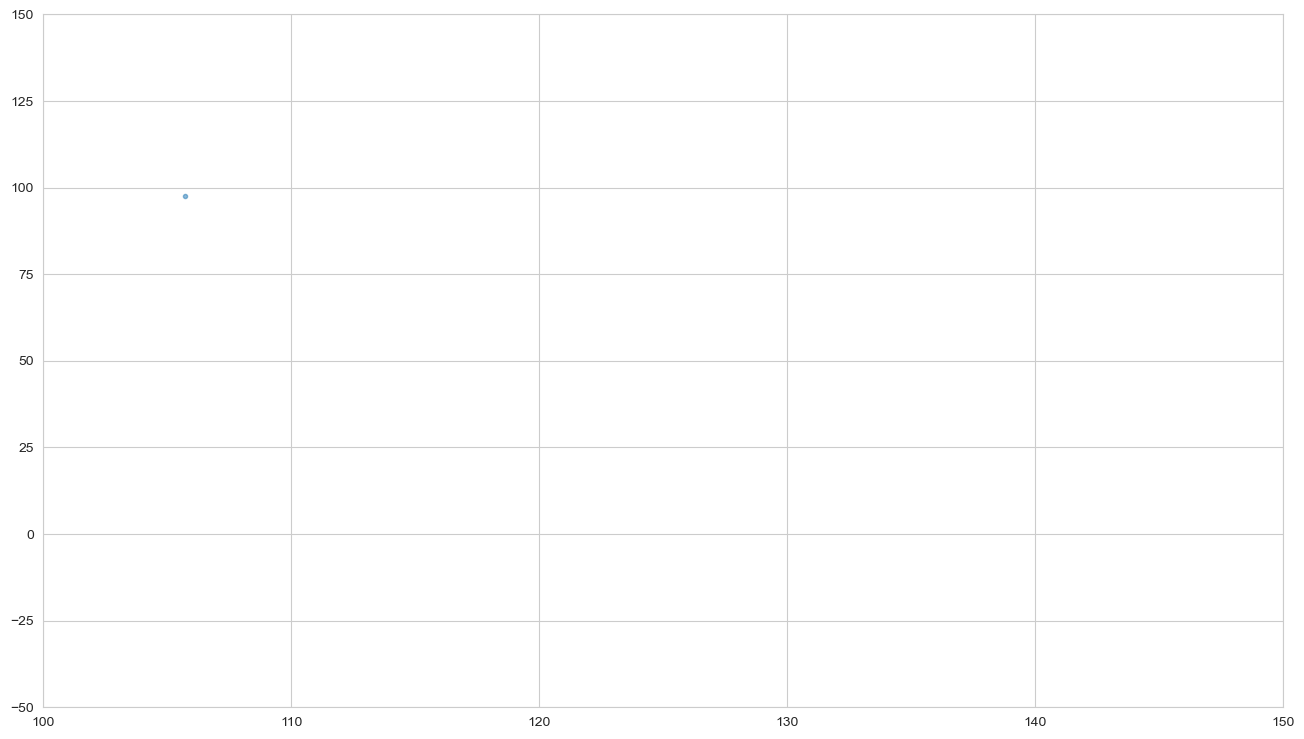

In [11]:
plt.scatter(vis_x, vis_y, marker='.', alpha=0.5)
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5)
plt.xlim([100,150])
plt.ylim([-50,150])
plt.show()

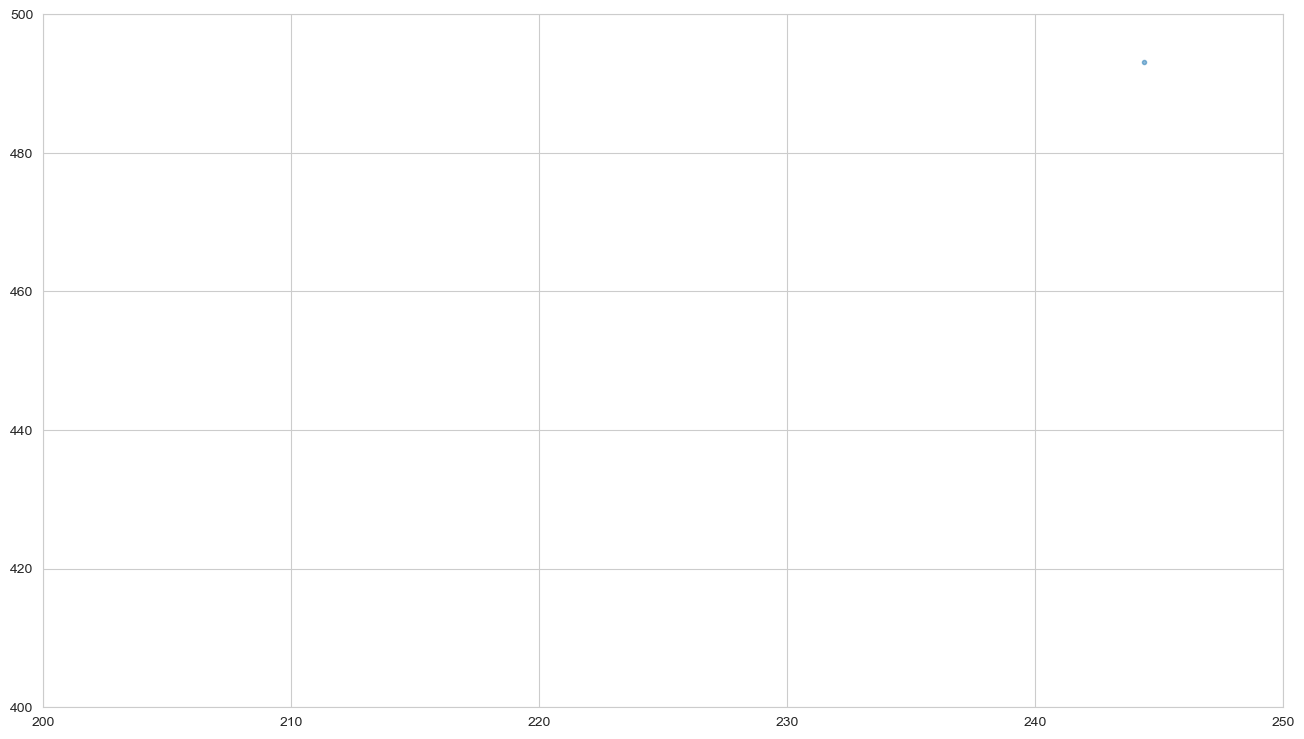

In [12]:
plt.scatter(vis_x, vis_y, marker='.', alpha=0.5)
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5)
plt.xlim([200,250])
plt.ylim([400,500])
plt.show()